# Binary Classification: Reservation Cancellation Prediction
### Цель
Построить модель для предсказания отмены бронирования на основе данных с использованием логистической регрессии.

### Этапы:
1. Исследовательский анализ данных (EDA)
2. Предварительная обработка данных
3. Построение и оценка модели

## Методология

### Логистическая регрессия
Логистическая регрессия — это метод бинарной классификации, который используется для предсказания вероятности принадлежности объекта к одному из двух классов. Модель логистической регрессии основывается на линейной зависимости между признаками и логитом вероятности (логарифмическая трансформация вероятности).

Математически логистическая регрессия представляется следующим образом:

$$
P(y = 1 | X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n)}}
$$

где:
- $P(y = 1 | X)$ — вероятность того, что объект принадлежит к положительному классу (в нашем случае — бронирование будет отменено),
- $X_1, X_2, \dots, X_n$ — признаки объекта,
- $\beta_0, \beta_1, \dots, \beta_n$ — параметры модели.

#### Почему логистическая регрессия?
Логистическая регрессия — это простой и эффективный метод для задач классификации, особенно если данные имеют линейную зависимость между признаками и целевой переменной. В случае с отменой бронирования, признаки, такие как количество взрослых и детей, тип питания, стоимость, могут иметь влияние на решение клиента об отмене бронирования.

### Метрики оценки модели

Для оценки качества модели логистической регрессии мы будем использовать следующие метрики:

#### 1. **Точность (Accuracy)**
Точность измеряет, какой процент предсказаний модели совпадает с реальными результатами:

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

где:
- $TP$ — количество истинных положительных,
- $TN$ — количество истинных отрицательных,
- $FP$ — количество ложных положительных,
- $FN$ — количество ложных отрицательных.

Точность полезна, но она может быть вводящей в заблуждение в случаях, когда классы несбалансированы (например, если отмены составляют лишь 10% от всех бронирований).

#### 2. **Матрица ошибок (Confusion Matrix)**
Матрица ошибок представляет собой таблицу, которая показывает количество правильных и неправильных предсказаний по классам. Это позволяет детально понять, как модель классифицирует объекты.

Матрица ошибок состоит из четырех элементов:
- **True Positive (TP)**: количество верных предсказаний класса "Отмена".
- **True Negative (TN)**: количество верных предсказаний класса "Не отменено".
- **False Positive (FP)**: количество ошибок, когда модель предсказала "Отмена", но это не так.
- **False Negative (FN)**: количество ошибок, когда модель предсказала "Не отменено", но это была отмена.

#### 3. **ROC-AUC**
Метрика ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) оценивает способность модели различать положительные и отрицательные классы. ROC-кривая показывает зависимость между истинными положительными (TPR) и ложными положительными (FPR) на различных порогах вероятности. 

Значение AUC может варьироваться от 0 до 1:
- **0.5** — случайное предсказание.
- **0.7 - 0.8** — хороший результат.
- **0.8 - 0.9** — отличный результат.
- **1.0** — идеальная модель.

В нашем случае, с ROC-AUC = 0.84, модель показывает отличные результаты в различении отменённых и не отменённых бронирований.

### Почему мы используем эти метрики?
- **Точность** важна, но она может быть нечувствительна к несбалансированным данным. Например, если модель всегда предсказывает, что бронирование не отменено, она всё равно может получить высокую точность, даже если она не обнаруживает отмены.
- **Матрица ошибок** помогает визуализировать типы ошибок и понять, как модель работает на разных классах.
- **ROC-AUC** предоставляет более полное представление о производительности модели, особенно если классы несбалансированы, и помогает избежать ложных выводов, основанных только на точности.

## Заключение
Модель логистической регрессии является хорошим выбором для задачи бинарной классификации в данном случае, так как она проста в реализации и интерпретации, а также предоставляет адекватные результаты для предсказания отмены бронирований. Оценка модели с использованием ROC-AUC показала, что модель эффективно различает отменённые и не отменённые бронирования, и может быть использована для практического применения.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

## 1. Загрузка данных

In [2]:
data = pd.read_csv("data.csv")
data.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


## 2. Исследовательский анализ данных (EDA)
### Информация о данных и базовая статистика

In [3]:
print("Информация о данных:")
data.info()

print("\nСтатистические характеристики:")
print(data.describe())

print("\nПроверка на пропущенные значения:")
print(data.isnull().sum())

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  

### Распределение целевой переменной

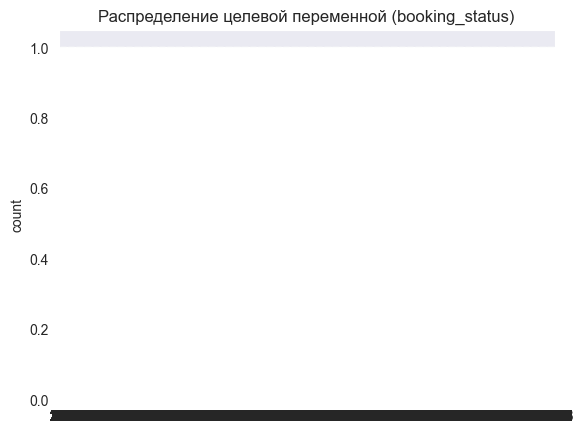

In [4]:
sns.countplot(data['booking_status'])
plt.title('Распределение целевой переменной (booking_status)')
plt.show()

### Визуализация числовых переменных

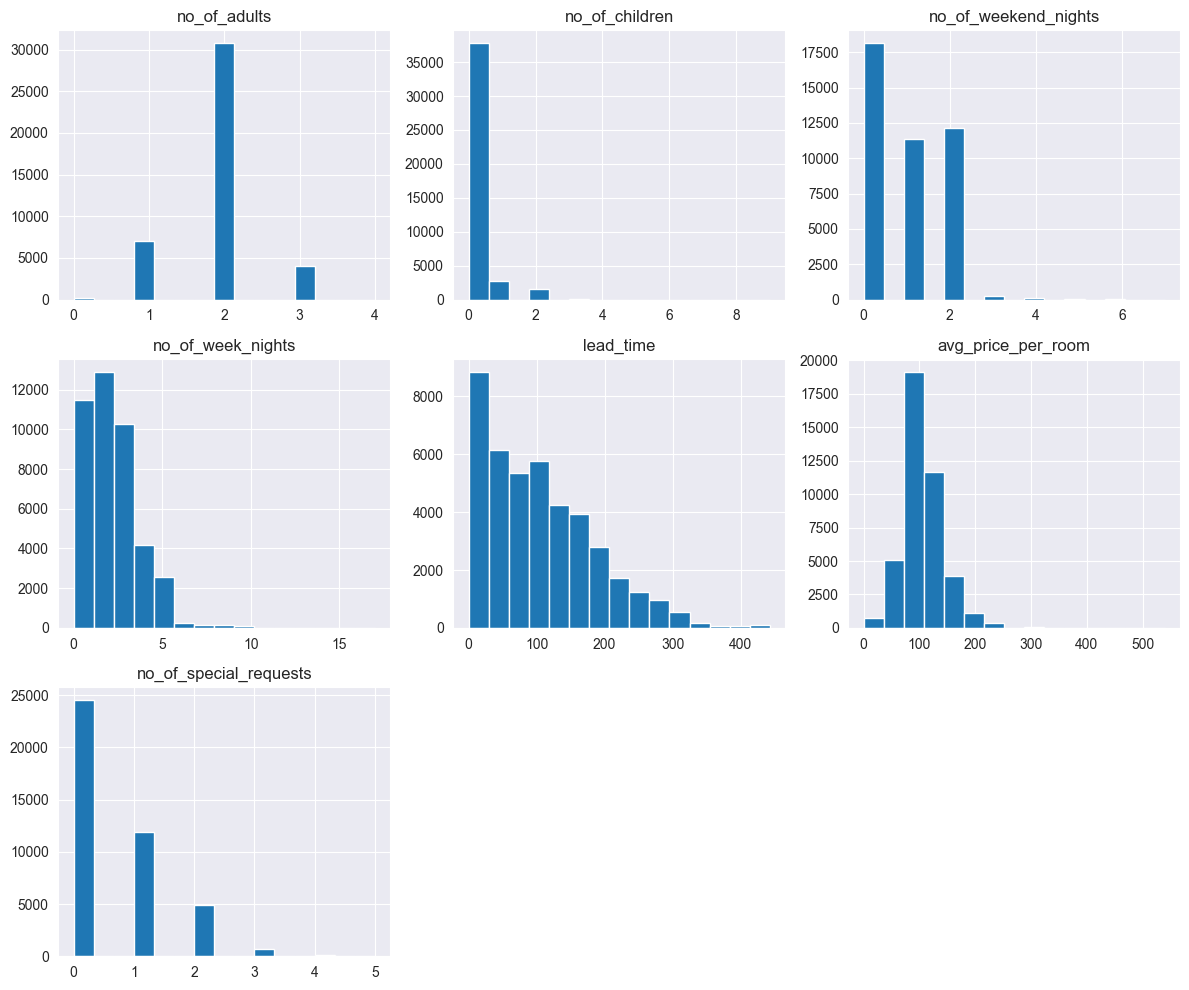

In [5]:
num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'avg_price_per_room', 'no_of_special_requests']
data[num_cols].hist(figsize=(12, 10), bins=15)
plt.tight_layout()
plt.show()

### Корреляция числовых переменных

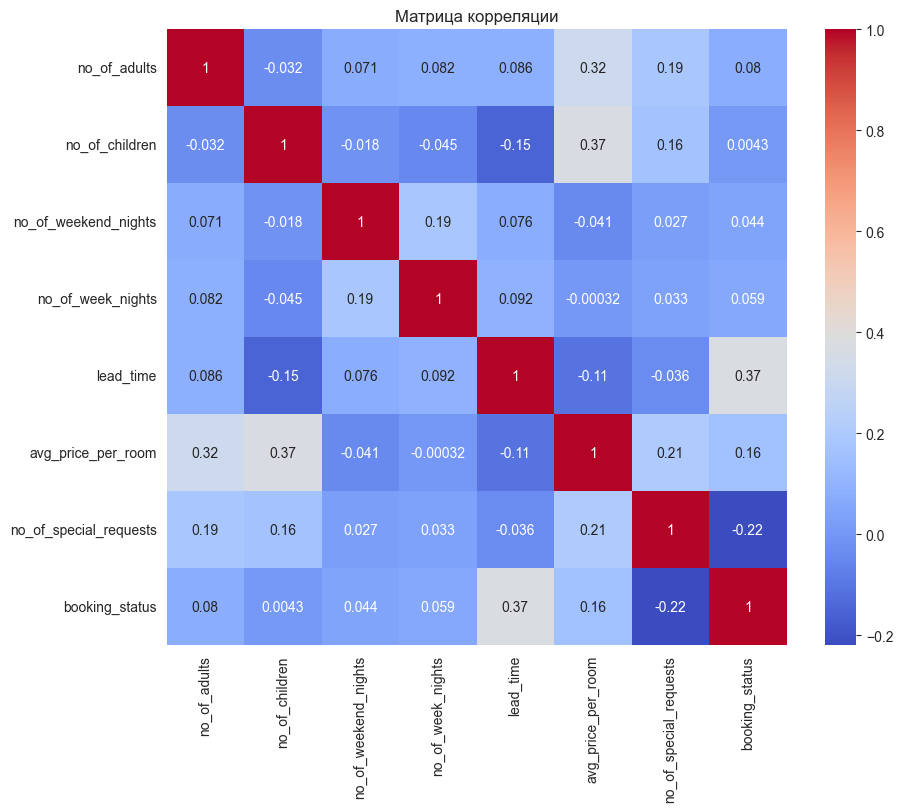

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[num_cols + ['booking_status']].corr(), annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

## 3. Предварительная обработка данных

In [7]:
# Преобразование целевой переменной
label_encoder = LabelEncoder()
data['booking_status'] = label_encoder.fit_transform(data['booking_status'])

# Обработка категориальных переменных
categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Удаление ненужных столбцов
data.drop(['id', 'arrival_year', 'arrival_month', 'arrival_date'], axis=1, inplace=True)

# Нормализация числовых переменных
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

## 4. Построение и оценка модели

Классификационный отчёт:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      5119
           1       0.73      0.69      0.71      3301

    accuracy                           0.78      8420
   macro avg       0.77      0.76      0.76      8420
weighted avg       0.78      0.78      0.78      8420

Матрица ошибок:


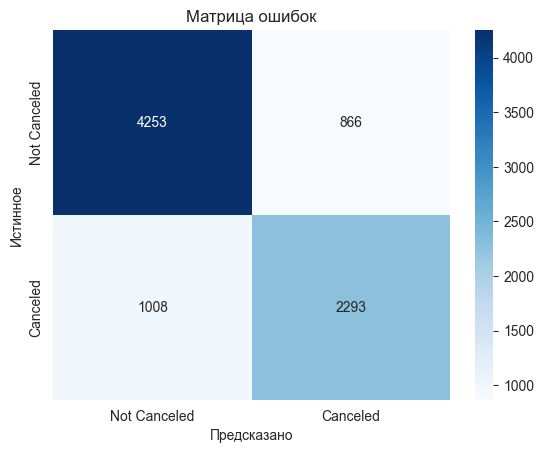

In [8]:
# Разделение данных на тренировочные и тестовые
X = data.drop('booking_status', axis=1)
y = data['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Обучение модели
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Оценка модели
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Классификационный отчёт:")
print(classification_report(y_test, y_pred))

print("Матрица ошибок:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Предсказано')
plt.ylabel('Истинное')
plt.title('Матрица ошибок')
plt.show()

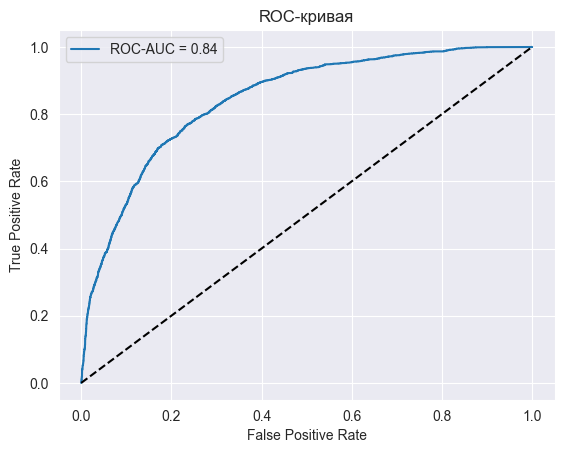

In [9]:
# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f'ROC-AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.show()

## 5. Выводы
Модель Logistic Regression успешно обучена и оценена. Основные метрики представлены выше.